In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [6]:
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
    
print(type(train_data))

<class 'dict'>


In [0]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [8]:
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


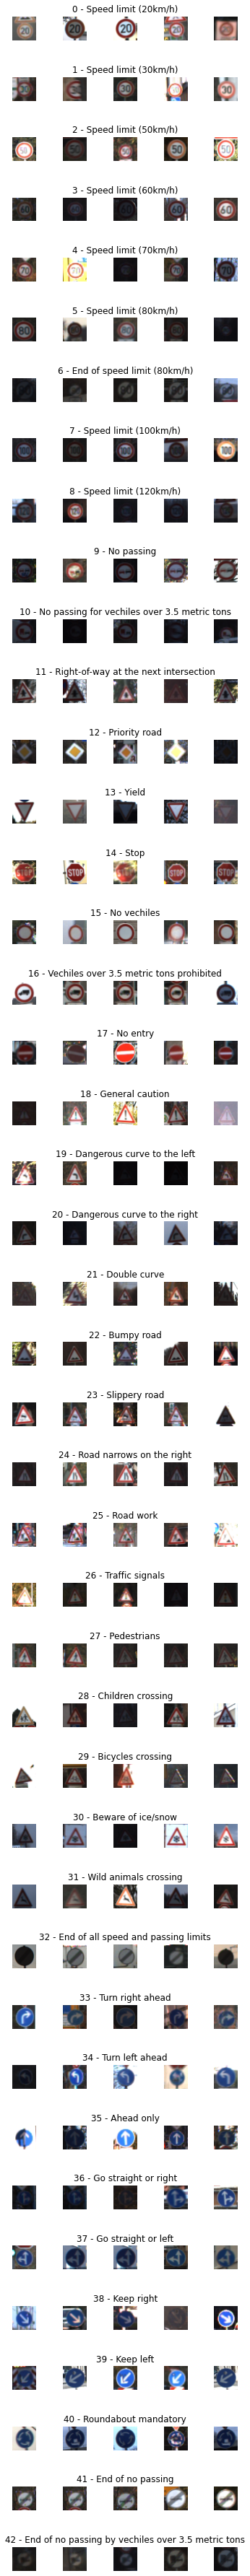

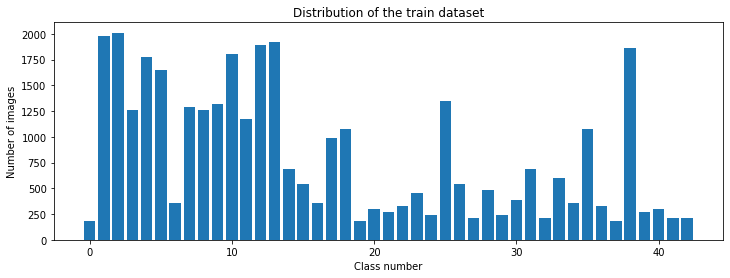

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


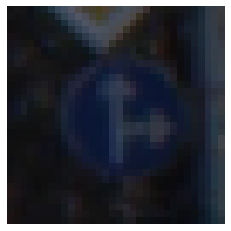

In [11]:
import cv2
 
plt.imshow(X_train[1000],cmap='gray')
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


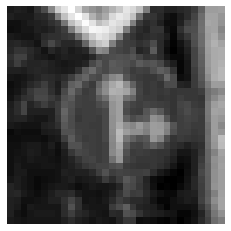

In [12]:
img = grayscale(X_train[1000])
plt.imshow(img,cmap='gray')
plt.axis("off")
print(img.shape)

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


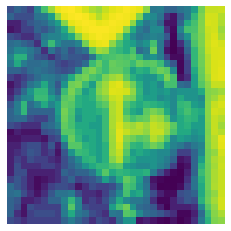

In [13]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img



In [0]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(34799, 32, 32)


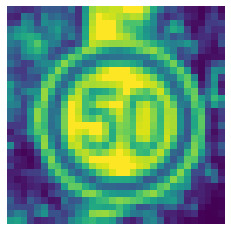

In [16]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)



In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
# create model
 
def leNet_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
  
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
  
    model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [21]:
model=leNet_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [22]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 8s 223us/step - loss: 2.5865 - accuracy: 0.3226 - val_loss: 1.2782 - val_accuracy: 0.6449
Epoch 2/10
34799/34799 [==============================] - 1s 43us/step - loss: 0.8956 - accuracy: 0.7263 - val_loss: 0.6163 - val_accuracy: 0.8186
Epoch 3/10
34799/34799 [==============================] - 1s 43us/step - loss: 0.5066 - accuracy: 0.8485 - val_loss: 0.4419 - val_accuracy: 0.8687
Epoch 4/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.3525 - accuracy: 0.8960 - val_loss: 0.3630 - val_accuracy: 0.8971
Epoch 5/10
34799/34799 [==============================] - 1s 43us/step - loss: 0.2684 - accuracy: 0.9211 - val_loss: 0.3199 - val_accuracy: 0.9048
Epoch 6/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.2148 - accuracy: 0.9398 - val_loss: 0.2888 - val_accuracy: 0.9134
Epoch 7/10
34799/34799 [==============================] - 1s 43us/st

Text(0.5, 0, 'epoch')

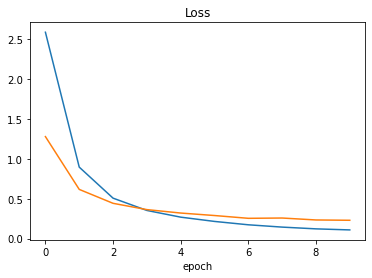

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

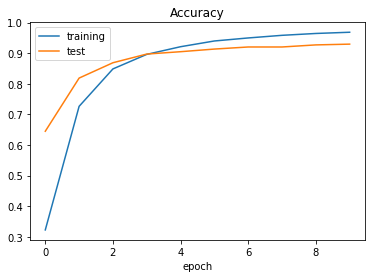

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [25]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
 

Test score: 0.343568522186385
Test accuracy: 0.9153602719306946


In [0]:
#Because of model is overfittinfg,let's change the original leNet model
# modified model
 
def leNet_model2():
    
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
  
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
  
    model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [27]:
model2=leNet_model2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 30)        16230     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               540500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [28]:
history2=model2.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 3s 85us/step - loss: 2.2866 - accuracy: 0.3906 - val_loss: 0.9158 - val_accuracy: 0.7277
Epoch 2/10
34799/34799 [==============================] - 2s 67us/step - loss: 0.6714 - accuracy: 0.7915 - val_loss: 0.5050 - val_accuracy: 0.8465
Epoch 3/10
34799/34799 [==============================] - 2s 67us/step - loss: 0.3610 - accuracy: 0.8908 - val_loss: 0.3646 - val_accuracy: 0.8900
Epoch 4/10
34799/34799 [==============================] - 2s 68us/step - loss: 0.2405 - accuracy: 0.9278 - val_loss: 0.3131 - val_accuracy: 0.9007
Epoch 5/10
34799/34799 [==============================] - 2s 68us/step - loss: 0.1782 - accuracy: 0.9480 - val_loss: 0.2578 - val_accuracy: 0.9213
Epoch 6/10
34799/34799 [==============================] - 2s 68us/step - loss: 0.1391 - accuracy: 0.9595 - val_loss: 0.2516 - val_accuracy: 0.9240
Epoch 7/10
34799/34799 [==============================] - 2s 67us/ste

Text(0.5, 0, 'epoch')

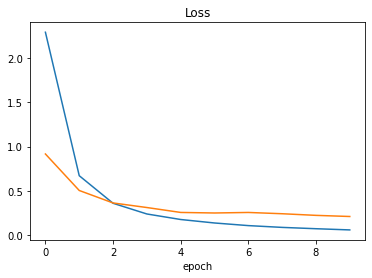

In [29]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

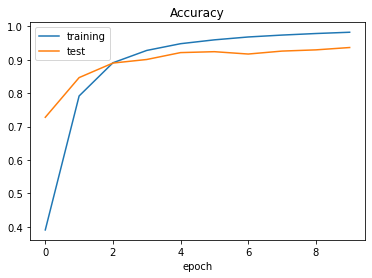

In [30]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

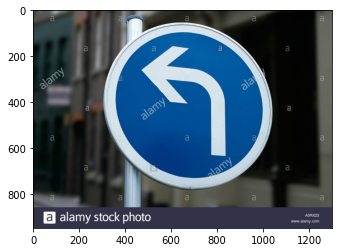

In [38]:
#Testing new images
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


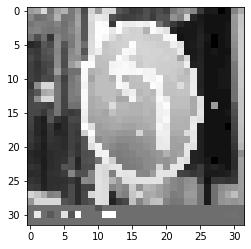

In [39]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [40]:
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [35]


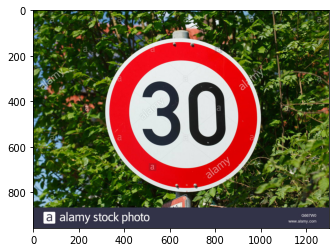

In [41]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


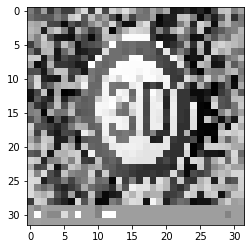

In [42]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [43]:
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [1]


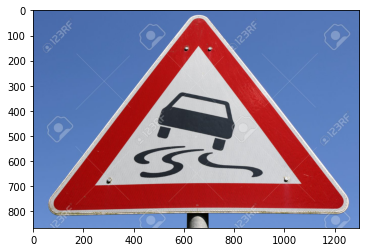

In [44]:
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


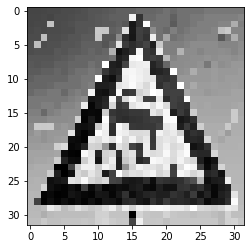

In [45]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [46]:
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [23]


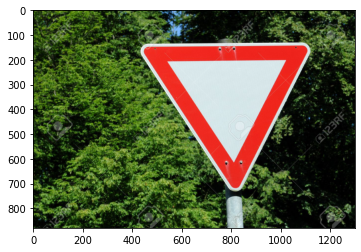

In [47]:
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


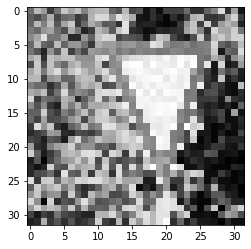

In [48]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [49]:
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [13]


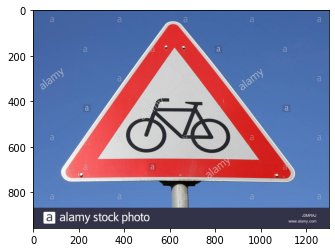

In [50]:
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


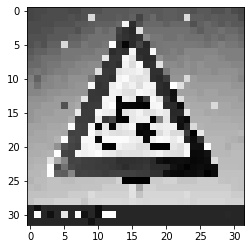

In [51]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [52]:
print("predicted sign: "+ str(model2.predict_classes(img)))

predicted sign: [30]


In [0]:
#Only 2 predictions are correct,Let;s use data augmentation technique to increase the accuracy